This notebook is based on https://nbviewer.ipython.org/github/cknoll/beispiele/blob/master/polynommatrix-1-form.ipynb (an example from my PhD-thesis).

To run it the following packages need to be installed:

- `pip install symbtools`
- `pip install ipydex`

In [1]:
import time
print(time.ctime())
%load_ext ipydex.displaytools

Tue May  4 21:21:06 2021


In [2]:
import sympy as sp
from sympy import sin, cos
import symbtools as st
import symbtools.noncommutativetools as nct
sp.interactive.printing.init_printing(1)

In [3]:
x1, x2, x3, s, t = sp.symbols('x1, x2, x3, s, t', commutative=False)
xx = sp.Matrix([x1, x2, x3])
xxdot = st.time_deriv(xx, xx)
xxddot = st.time_deriv(xx, xx, order=2)
st.make_global(xx, xxdot, xxddot)



Note:
- $s:=\frac{d}{dt}$ for abbreviation
- $x_1, ..., x_3$ are regarded as time implicitly dependent if used as argument `func_symbols`

Scalar demo. Applying derivative operator $\hat =$ shift it to the right according to some rules.

In [4]:
r = nct.right_shift_all(s*x1, func_symbols=xx) ##:

---

In [5]:
nct.right_shift_all(s*r, func_symbols=xx)

In [6]:
nct.right_shift_all(s**2 *x1, func_symbols=xx)

In [7]:
nct.right_shift_all((5*s**2 - s)*x1, func_symbols=xx)

Matrix demo. Goal: $L\Big(\frac{d}{dt}\Big)\circ A(t)$

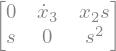

---

In [8]:
L = sp.Matrix([[0, xdot3, x2*s], [s, 0, s**2]]) ##:

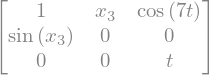

---

In [9]:
A = sp.Matrix([[1, x3, sp.cos(7*t)], [sin(x3), 0, 0], [0, 0, t]]) ##:

Perform matrix multiplication while respecting operator order

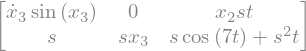

---

In [10]:
res = nct.nc_mul(L, A) ##:

Apply derivative operator (shift to the right)

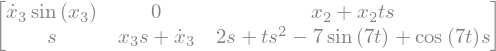

In [11]:
nct.right_shift_all(res, func_symbols=xx)